In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.datasets import boston_housing

In [6]:
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [13]:
mean_train = X_train.mean(axis = 0)
std_train = X_train.std(axis = 0)

X_train_new = (X_train-mean_train)/std_train
X_test_new = (X_test-mean_train)/std_train

In [19]:
X_train_new.shape[1]
14*16

224

In [111]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape = (X_train_new.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))


In [110]:
model.compile(optimizer = "adam", loss="mse", metrics = ["mape"])
history = model.fit(X_train_new,y_train, epochs = 50, verbose = 0)

ypred_train = model.predict(X_train_new)
ypred_test = model.predict(X_test_new)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,ypred_train))
print(mean_squared_error(y_test,ypred_test))

9.238399021979303
21.211325258105507


loss    2.236108
mape    5.633093
Name: 999, dtype: float64

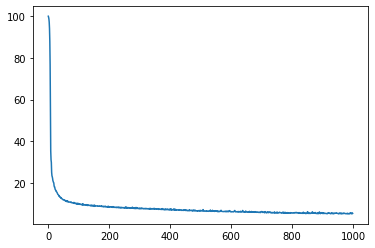

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history.history)
df["mape"].plot()
df.iloc[-1,:]

In [122]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape = (X_train_new.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

model.compile(optimizer = "adam", loss="mse", metrics = ["mape"])
history = model.fit(X_train_new,y_train, epochs = 1000, verbose = 0, validation_split=0.1)

In [ ]:
df = pd.DataFrame(history.history)
df[["loss","val_loss"]].plot()
plt.ylim([4,8])

In [124]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape = (X_train_new.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50)

model.compile(optimizer = "adam", loss="mse", metrics = ["mape"])
history = model.fit(X_train_new,y_train, epochs = 1000, verbose = 0, validation_split=0.1, callbacks=[early_stop])



(4.0, 15.0)

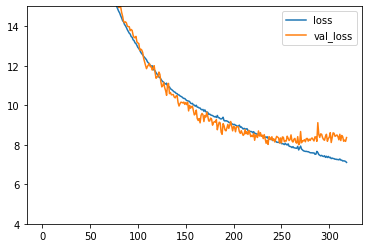

In [127]:
df = pd.DataFrame(history.history)
df[["loss","val_loss"]].plot()
plt.ylim([4,15])

In [130]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (X_train_new.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50)

model.compile(optimizer = "adam", loss="mse", metrics = ["mape"])
history = model.fit(X_train_new,y_train, epochs = 1000, verbose = 0, validation_split=0.1, callbacks=[early_stop])

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________

In [ ]:
df = pd.DataFrame(history.history)
df[["loss","val_loss"]].plot()
plt.ylim([4,15])

In [134]:
model = Sequential([Dense(128, activation="relu", input_shape = (X_train_new.shape[1],)),
                    Dropout(0.2),
                    Dense(64, activation="relu"),
                    Dropout(0.2),
                    Dense(32, activation="relu"),
                    Dense(1, activation="relu")])

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________